In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sys 
sys.path.append("../../") 
from compare_algorithms.utils import create_dataset
%matplotlib notebook

In [2]:
filename = '../../data/week_data/data/California_winter_20120101-20120107新.csv'
x_train, y_train, x_test, y_test = create_dataset(filename,seq_len=9)

In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((711, 9), (711,), (288, 9), (288,))

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
# 网格化搜索寻找最优参数
svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1,verbose=True),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)

In [6]:
# svr = SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1, verbose=True)

In [7]:
svr.fit(x_train, y_train)

[LibSVM]*
optimization finished, #iter = 513
obj = -108.089724, rho = -7.447927
nSV = 329, nBSV = 313
[LibSVM]*
optimization finished, #iter = 532
obj = -105.238283, rho = -6.881006
nSV = 332, nBSV = 317
[LibSVM]*
optimization finished, #iter = 502
obj = -101.686837, rho = -7.316021
nSV = 307, nBSV = 295
[LibSVM]*
optimization finished, #iter = 401
obj = -104.089438, rho = -7.172232
nSV = 309, nBSV = 291
[LibSVM]*
optimization finished, #iter = 387
obj = -93.082457, rho = -7.221826
nSV = 293, nBSV = 279
[LibSVM]*
optimization finished, #iter = 789
obj = -122.357402, rho = -7.080532
nSV = 299, nBSV = 239
[LibSVM]*
optimization finished, #iter = 900
obj = -115.231254, rho = -6.740972
nSV = 313, nBSV = 241
[LibSVM]*
optimization finished, #iter = 657
obj = -113.746997, rho = -7.165372
nSV = 290, nBSV = 235
[LibSVM]*
optimization finished, #iter = 716
obj = -118.977074, rho = -6.888626
nSV = 294, nBSV = 232
[LibSVM]*
optimization finished, #iter = 767
obj = -107.435128, rho = -7.176297
nSV

[LibSVM].........................................................................................*........................................................................................*.................................*
optimization finished, #iter = 210371
obj = -15746.654587, rho = -7.179473
nSV = 228, nBSV = 140
[LibSVM]..............................................................................*............................................................*...........*
optimization finished, #iter = 149648
obj = -16758.006755, rho = -5.592489
nSV = 223, nBSV = 135
[LibSVM]............................................*.....................................*
optimization finished, #iter = 81367
obj = -15022.797704, rho = -4.931006
nSV = 187, nBSV = 108
[LibSVM]......................................................................*.....................................................................................*..................................*..*
optimization finished, #iter = 

GridSearchCV(estimator=SVR(gamma=0.1, verbose=True),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [8]:
svr_predict = svr.predict(x_test)

<IPython.core.display.Javascript object>


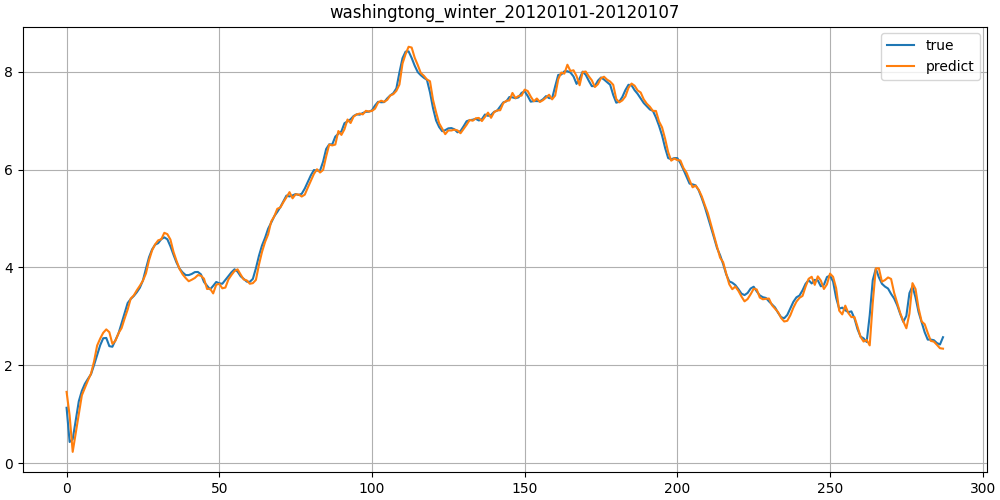

In [9]:
#  画出预测的图像，第二幅图为预测的图像，把缺失的数据补上
fig,ax = plt.subplots(figsize=(10, 5),layout='constrained')
ax.set_title("washingtong_winter_20120101-20120107")
ax.plot(y_test,label='true')
ax.plot(svr_predict,label='predict')
ax.grid()
ax.legend()
plt.show()

In [10]:
def cal_mse(y_hat, y):
    mse = (np.square(y_hat - y)).mean()
    return mse

In [11]:
mse = cal_mse(svr_predict, y_test)
mse

0.01299002831060289

In [12]:
df = pd.DataFrame(data={
                'true_value': y_test,
                'predict': svr_predict
            })
df.to_csv("result/California_winter_20120101-20120107.csv", index=False)